Name:G.Rishik Reddy
Reg.No:BL.EN.U4AIE23109
Lab-4

1. Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
other performance metrics such as precision, recall and F1-Score measures for both training and test 
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

def load_data(file_path):
    data = pd.read_csv(file_path)
    X = data.drop(columns=["target"])
    y = data["target"]
    return X, y

def preprocess_data(X):
    return StandardScaler().fit_transform(X)

def train_knn(X_train, y_train, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return accuracy_score(y_true, y_pred), cm, precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)

file_path = r"C:\Users\rishi\PycharmProjects\ML-Lab3\heart.csv"
X, y = load_data(file_path)
X_train, X_test, y_train, y_test = train_test_split(preprocess_data(X), y, test_size=0.3, random_state=42)

model = train_knn(X_train, y_train)
y_train_pred, y_test_pred = model.predict(X_train), model.predict(X_test)

train_acc, train_cm, train_prec, train_rec, train_f1 = evaluate(y_train, y_train_pred)
test_acc, test_cm, test_prec, test_rec, test_f1 = evaluate(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.3f}\nTesting Accuracy: {test_acc:.3f}")
print(f"\nConfusion Matrix (Training):\n{train_cm}\nConfusion Matrix (Testing):\n{test_cm}")
print(f"\nTraining - Precision: {train_prec:.3f}, Recall: {train_rec:.3f}, F1 Score: {train_f1:.3f}")
print(f"Testing - Precision: {test_prec:.3f}, Recall: {test_rec:.3f}, F1 Score: {test_f1:.3f}")

if train_acc > 0.95 and test_acc < (train_acc - 0.2):
    print("\nThe model is overfitting.")
elif train_acc < 0.7 and test_acc < 0.7:
    print("\nThe model is underfitting.")
else:
    print("\nThe model has a good balance.")


Training Accuracy: 0.992
Testing Accuracy: 0.935

Confusion Matrix (Training):
[[336   4]
 [  2 375]]
Confusion Matrix (Testing):
[[149  10]
 [ 10 139]]

Training - Precision: 0.989, Recall: 0.995, F1 Score: 0.992
Testing - Precision: 0.933, Recall: 0.933, F1 Score: 0.933

The model has a good balance.


2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02. 
Analyse the results.

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = r"C:\Users\rishi\PycharmProjects\ML code\Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="IRCTC Stock Price")

print(df.head())
print("\nColumn Names:", df.columns)

df = df.select_dtypes(include=[np.number])
print("\nFiltered Numeric Columns:", df.columns)

target_col = "Price"
if target_col not in df.columns:
    raise ValueError(f"Column '{target_col}' not found. Available columns: {df.columns}")

X = df.drop(columns=[target_col], errors='ignore')
y = df[target_col]

if X.shape[1] == 0:
    raise ValueError("No valid features found after dropping the target column. Check dataset.")

X = X.fillna(X.mean())
y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg%  
0  0.0020  
1  0.0043  
2 -0.0020  
3 -0.0026  
4 -0.0023  

Column Names: Index(['Date', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Volume',
       'Chg%'],
      dtype='object')

Filtered Numeric Columns: Index(['Price', 'Open', 'High', 'Low', 'Chg%'], dtype='object')

Mean Squared Error (MSE): 127.0504
Root Mean Squared Error (RMSE): 11.2717
Mean Absolute Percentage Error (MAPE): 0.43%
R² Score: 0.9981


3.. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary 
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 - 
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class 
color. Observe the plot.

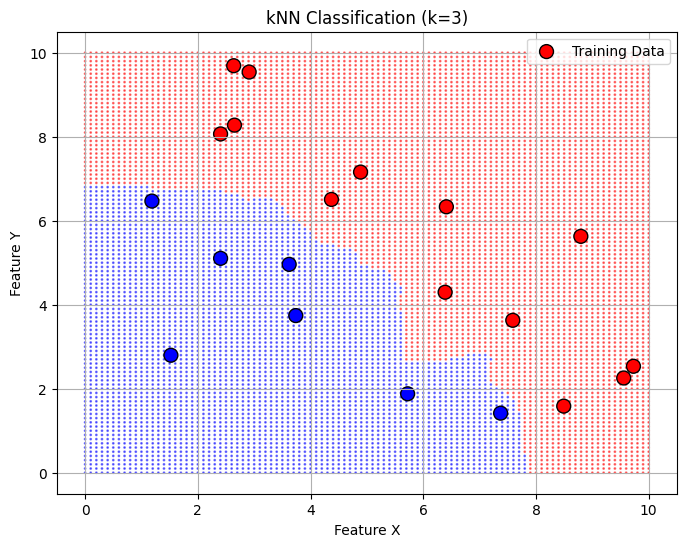

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)

labels_train = (X_train + Y_train > 10).astype(int)

X_test, Y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
X_test_flat = X_test.ravel()
Y_test_flat = Y_test.ravel()
test_data = np.c_[X_test_flat, Y_test_flat]

train_data = np.c_[X_train, Y_train]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, labels_train)
predicted_classes = knn.predict(test_data)

colors_test = ['blue' if c == 0 else 'red' for c in predicted_classes]

plt.figure(figsize=(8, 6))
plt.scatter(X_test_flat, Y_test_flat, c=colors_test, s=1, alpha=0.5)

plt.scatter(X_train, Y_train, c=['blue' if c == 0 else 'red' for c in labels_train], edgecolors='black', s=100, label='Training Data')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification (k=3)')
plt.legend()
plt.grid(True)
plt.show()

4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. 
This creates a test set of about 10,000 points. Classify these points with above training data using 
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their 
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread 
and class boundary lines in the feature space.

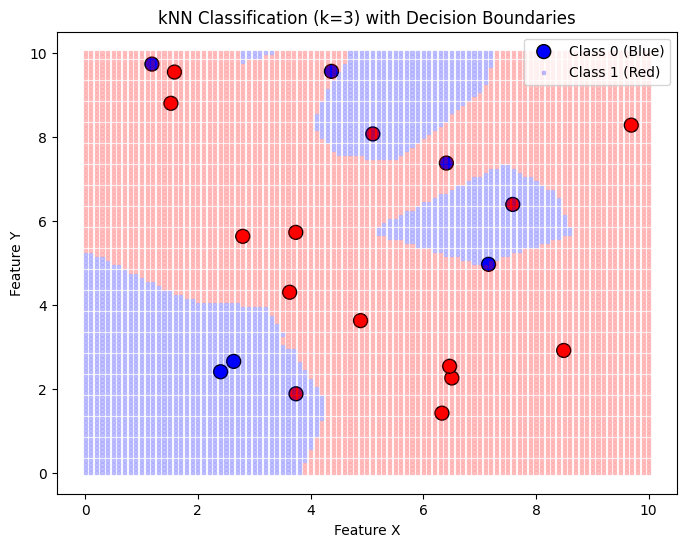

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
X_train = np.random.uniform(1, 10, (20, 2))
y_train = np.random.choice([0, 1], size=20)

x_test_vals = np.arange(0, 10.1, 0.1)
y_test_vals = np.arange(0, 10.1, 0.1)
X_test = np.array([[x, y] for x in x_test_vals for y in y_test_vals])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr", edgecolors='k', marker="o", s=100, label="Training Data")

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="bwr", alpha=0.2, marker="s", s=5, label="Predicted Test Data")

plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("kNN Classification (k=3) with Decision Boundaries")
plt.legend(["Class 0 (Blue)", "Class 1 (Red)"], loc="upper right")
plt.show()

5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

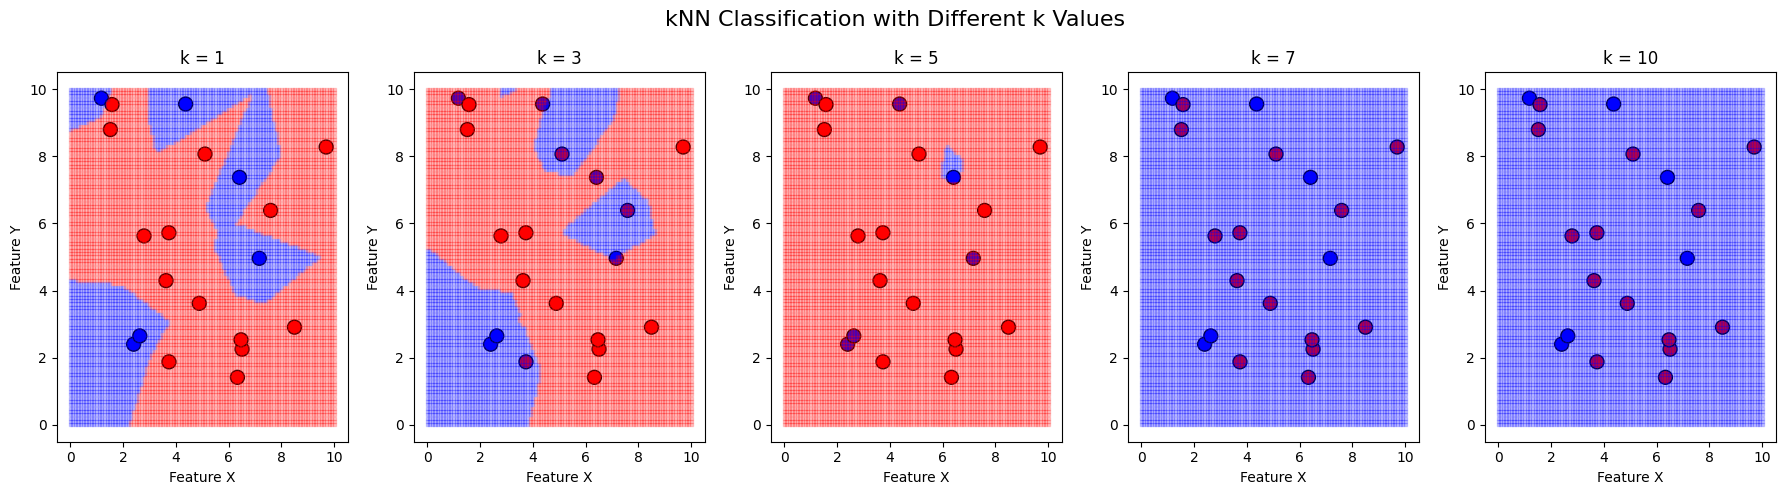

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
X_train = np.random.uniform(1, 10, (20, 2))
y_train = np.random.choice([0, 1], size=20)

x_test_vals = np.arange(0, 10.1, 0.1)
y_test_vals = np.arange(0, 10.1, 0.1)
X_test = np.array([[x, y] for x in x_test_vals for y in y_test_vals])

k_values = [1, 3, 5, 7, 10]

fig, axes = plt.subplots(1, len(k_values), figsize=(18, 5))

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    ax = axes[i]
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr", edgecolors='k', marker="o", s=100, label="Training Data")

    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="bwr", alpha=0.2, marker="s", s=5)

    ax.set_title(f"k = {k}")
    ax.set_xlabel("Feature X")
    ax.set_ylabel("Feature Y")

plt.suptitle("kNN Classification with Different k Values", fontsize=16)
plt.tight_layout()
plt.show()

6.Repeat the exercises A3 to A5 for your project data considering any two features and classes.

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


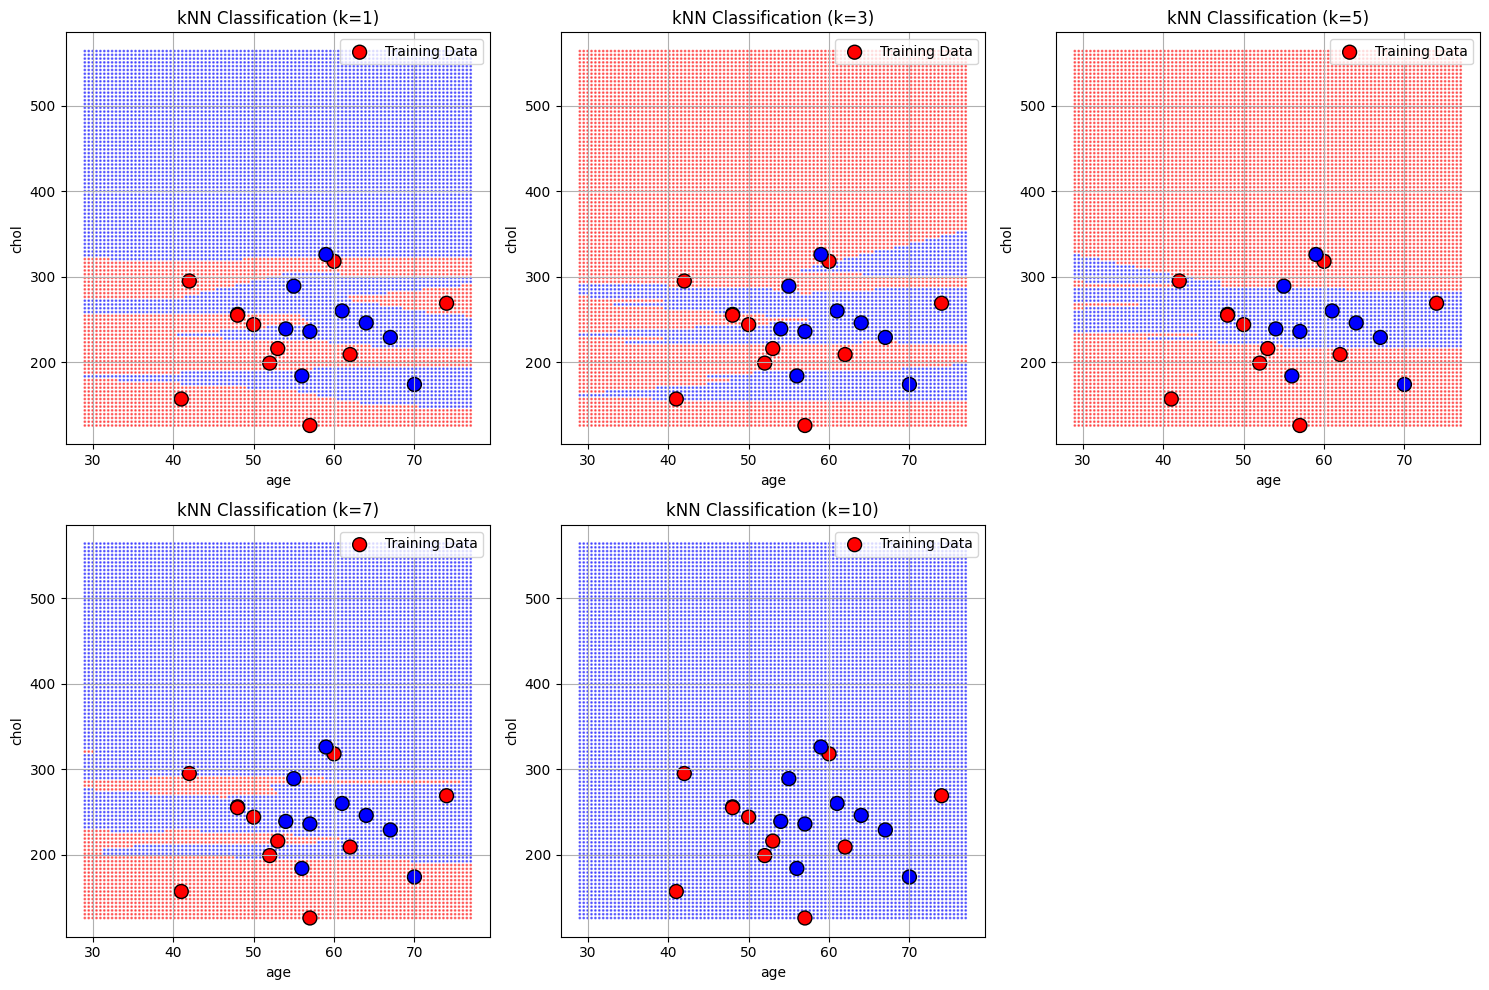

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

file_path = r"C:\Users\rishi\PycharmProjects\ML-Lab3\heart.csv"
df = pd.read_csv(file_path)

print(df.head())

feature_x = "age"
feature_y = "chol"
class_label = "target"

df = df[[feature_x, feature_y, class_label]].dropna()

df[class_label] = df[class_label].astype('category').cat.codes

train_data = df.sample(n=20, random_state=42)
X_train = train_data[[feature_x, feature_y]].values
y_train = train_data[class_label].values

X_test, Y_test = np.meshgrid(np.linspace(df[feature_x].min(), df[feature_x].max(), 100),
                                np.linspace(df[feature_y].min(), df[feature_y].max(), 100))
X_test_flat = X_test.ravel()
Y_test_flat = Y_test.ravel()
test_data = np.c_[X_test_flat, Y_test_flat]

k_values = [1, 3, 5, 7, 10]

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predicted_classes = knn.predict(test_data)

    colors_test = ['blue' if c == 0 else 'red' for c in predicted_classes]

    plt.subplot(2, 3, i)
    plt.scatter(X_test_flat, Y_test_flat, c=colors_test, s=1, alpha=0.5)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=['blue' if c == 0 else 'red' for c in y_train],
                edgecolors='black', s=100, label='Training Data')

    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f'kNN Classification (k={k})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

7.. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your 
kNN classifier. This is called hyper-parameter tuning.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

file_path = r"C:\Users\rishi\PycharmProjects\ML-Lab3\heart.csv"
df = pd.read_csv(file_path)

feature_x = "age"
feature_y = "chol"
class_label = "target"

df = df[[feature_x, feature_y, class_label]].dropna()

df[class_label] = df[class_label].astype('category').cat.codes

X = df[[feature_x, feature_y]].values
y = df[class_label].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 50, 2)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_k_grid = grid_search.best_params_['n_neighbors']
best_k_random = random_search.best_params_['n_neighbors']

best_knn = KNeighborsClassifier(n_neighbors=best_k_grid)
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best k from GridSearchCV: {best_k_grid}")
print(f"Best k from RandomizedSearchCV: {best_k_random}")
print(f"Accuracy with best k ({best_k_grid}): {accuracy:.4f}")

Best k from GridSearchCV: 1
Best k from RandomizedSearchCV: 1
Accuracy with best k (1): 0.9805
